<a href="https://colab.research.google.com/github/rdeykin/rdeykin.github.io/blob/main/Data_Science_Project_Milestone_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive
!git clone https://github.com/rdeykin/CMPS_3160_Project.git
%cd CMPS_3160_Project/
!git pull
%cd Data/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive
fatal: destination path 'CMPS_3160_Project' already exists and is not an empty directory.
/content/drive/My Drive/CMPS_3160_Project
Already up to date.
/content/drive/My Drive/CMPS_3160_Project/Data


# Project Goals

The team, **Yali Tiomkin and Rafi Deykin**, will be exploring 2 datasets which explore health insurance and disabilities information in Louisiana, by parish.
The goal of this project is to gain an understanding of how several varibles related to health and levels of insurance, as well as income are related to each other. So far, we have found datasets related to levels of insurance and levels of disability by parish in Louisiana. 

## Collaboration Plan

Our plan is to meet at least once a week to discuss progress and check in. Additionally, we will be communicating daily by text to share thoughts and ideas about how we can analyze our data in different ways, as well as ideas about other data that might be pertinent to our research question.

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
disabilities_LA = pd.read_csv("../Data/ACSST1Y2021.S1810-2022-10-03T172801.csv")
health_insur_LA = pd.read_csv("../Data/ACSST1Y2021.S2701-2022-10-10T235340.csv")

# Table 1: Disabilities

After reading in our two files, we began to clean the disabilities dataset first. This dataset includes data about several types of disabiliities, including hearing, vision, and cognitive difficulties as well as others. They are all reported by parish as numbers and percentages.

Below, we dropped several columns which serve as nonfunctional headers, then we dropped columns representing the margin of error, which we decided not to look into in our analysis. This is because we feel that the margin of error isn't necessary in the larger context of our analysis as they will not have a huge effect on the correlations and trends that we discover.

In [ ]:
disabilities_LA.drop(labels=[1,4,14,21],axis=0,inplace=True)
disabilities_LA.drop(labels=['Ascension Parish, Louisiana!!Total!!Margin of Error',
                             'Ascension Parish, Louisiana!!With a disability!!Margin of Error',
                             'Ascension Parish, Louisiana!!Percent with a disability!!Margin of Error',
                             'Bossier Parish, Louisiana!!Total!!Margin of Error',
                             'Bossier Parish, Louisiana!!With a disability!!Margin of Error',
                             'Bossier Parish, Louisiana!!Percent with a disability!!Margin of Error',
                             'Caddo Parish, Louisiana!!Total!!Margin of Error',
                             'Caddo Parish, Louisiana!!With a disability!!Margin of Error',
                             'Caddo Parish, Louisiana!!Percent with a disability!!Margin of Error',
                             'Calcasieu Parish, Louisiana!!Total!!Margin of Error',
                             'Calcasieu Parish, Louisiana!!With a disability!!Margin of Error',
                             'Calcasieu Parish, Louisiana!!Percent with a disability!!Margin of Error',
                             'East Baton Rouge Parish, Louisiana!!Total!!Margin of Error',
                             'East Baton Rouge Parish, Louisiana!!With a disability!!Margin of Error',
                             'East Baton Rouge Parish, Louisiana!!Percent with a disability!!Margin of Error',
                             'Iberia Parish, Louisiana!!Total!!Margin of Error',
                             'Iberia Parish, Louisiana!!With a disability!!Margin of Error',
                             'Iberia Parish, Louisiana!!Percent with a disability!!Margin of Error',
                             'Jefferson Parish, Louisiana!!Total!!Margin of Error',
                             'Jefferson Parish, Louisiana!!With a disability!!Margin of Error',
                             'Jefferson Parish, Louisiana!!Percent with a disability!!Margin of Error',
                             'Lafayette Parish, Louisiana!!Total!!Margin of Error',
                             'Lafayette Parish, Louisiana!!With a disability!!Margin of Error',
                             'Lafayette Parish, Louisiana!!Percent with a disability!!Margin of Error',
                             'Lafourche Parish, Louisiana!!Total!!Margin of Error',
                             'Lafourche Parish, Louisiana!!With a disability!!Margin of Error',
                             'Lafourche Parish, Louisiana!!Percent with a disability!!Margin of Error',
                             'Livingston Parish, Louisiana!!Total!!Margin of Error',
                             'Livingston Parish, Louisiana!!With a disability!!Margin of Error',
                             'Livingston Parish, Louisiana!!Percent with a disability!!Margin of Error',
                             'Orleans Parish, Louisiana!!Total!!Margin of Error',
                             'Orleans Parish, Louisiana!!With a disability!!Margin of Error',
                             'Orleans Parish, Louisiana!!Percent with a disability!!Margin of Error',
                             'Ouachita Parish, Louisiana!!Total!!Margin of Error',
                             'Ouachita Parish, Louisiana!!With a disability!!Margin of Error',
                             'Ouachita Parish, Louisiana!!Percent with a disability!!Margin of Error',
                             'Rapides Parish, Louisiana!!Total!!Margin of Error',
                             'Rapides Parish, Louisiana!!With a disability!!Margin of Error',
                             'Rapides Parish, Louisiana!!Percent with a disability!!Margin of Error',
                             'Tangipahoa Parish, Louisiana!!With a disability!!Margin of Error',
                             'St. Landry Parish, Louisiana!!Total!!Margin of Error',
                             'St. Landry Parish, Louisiana!!With a disability!!Margin of Error',
                             'St. Landry Parish, Louisiana!!Percent with a disability!!Margin of Error',
                             'St. Tammany Parish, Louisiana!!Total!!Margin of Error',
                             'St. Tammany Parish, Louisiana!!With a disability!!Margin of Error',
                             'St. Tammany Parish, Louisiana!!Percent with a disability!!Margin of Error',
                             'Tangipahoa Parish, Louisiana!!Total!!Margin of Error',
                             'Tangipahoa Parish, Louisiana!!Percent with a disability!!Margin of Error',
                             'Terrebonne Parish, Louisiana!!Total!!Margin of Error',
                             'Terrebonne Parish, Louisiana!!With a disability!!Margin of Error',
                             'Terrebonne Parish, Louisiana!!Percent with a disability!!Margin of Error'],
                              axis=1, inplace=True)

Next, we renamed the columns, which have transferred in a difficult and hard-to-read format where exclamation points replace the spaces. Thus, we shorten all titles of columns below.

In [ ]:
disabilities_LA=disabilities_LA.rename(columns={'Label (Grouping)': 'Label',
                                                'Ascension Parish, Louisiana!!Total!!Estimate':"Ascension Total",
                                                'Ascension Parish, Louisiana!!With a disability!!Estimate': 'Ascension Disabilities',
                                                'Ascension Parish, Louisiana!!Percent with a disability!!Estimate': 'Ascension Disabilities Percent',
                                                'Bossier Parish, Louisiana!!Total!!Estimate':"Bossier Total",
                                                'Bossier Parish, Louisiana!!With a disability!!Estimate': 'Bossier Disabilities',
                                                'Bossier Parish, Louisiana!!Percent with a disability!!Estimate': 'Bossier Disabilities Percent',
                                                'Caddo Parish, Louisiana!!Total!!Estimate':"Caddo Total",
                                                'Caddo Parish, Louisiana!!With a disability!!Estimate': 'Caddo Disabilities',
                                                'Caddo Parish, Louisiana!!Percent with a disability!!Estimate': 'Caddo Disabilities Percent',
                                                'Calcasieu Parish, Louisiana!!Total!!Estimate':"Calcasieu Total",
                                                'Calcasieu Parish, Louisiana!!With a disability!!Estimate': 'Calcasieu Disabilities',
                                                'Calcasieu Parish, Louisiana!!Percent with a disability!!Estimate': 'Calcasieu Disabilities Percent',
                                                'East Baton Rouge Parish, Louisiana!!Total!!Estimate':"East Baton Rouge Total",
                                                'East Baton Rouge Parish, Louisiana!!With a disability!!Estimate': 'East Baton Rouge Disabilities',
                                                'East Baton Rouge Parish, Louisiana!!Percent with a disability!!Estimate': 'East Baton Rouge Disabilities Percent',
                                                'Iberia Parish, Louisiana!!Total!!Estimate':"Iberia Total",
                                                'Iberia Parish, Louisiana!!With a disability!!Estimate': 'Iberia Disabilities',
                                                'Iberia Parish, Louisiana!!Percent with a disability!!Estimate': 'Iberia Disabilities Percent',
                                                'Jefferson Parish, Louisiana!!Total!!Estimate':"Jefferson Total",
                                                'Jefferson Parish, Louisiana!!With a disability!!Estimate': 'Jefferson Disabilities',
                                                'Jefferson Parish, Louisiana!!Percent with a disability!!Estimate': 'Jefferson Disabilities Percent',
                                                'Lafayette Parish, Louisiana!!Total!!Estimate':"Lafayette Total",
                                                'Lafayette Parish, Louisiana!!With a disability!!Estimate': 'Lafayette Disabilities',
                                                'Lafayette Parish, Louisiana!!Percent with a disability!!Estimate': 'Lafayette Disabilities Percent',
                                                'Lafourche Parish, Louisiana!!Total!!Estimate':"Lafourche Total",
                                                'Lafourche Parish, Louisiana!!With a disability!!Estimate': 'Lafourche Disabilities',
                                                'Lafourche Parish, Louisiana!!Percent with a disability!!Estimate': 'Lafourche Disabilities Percent',
                                                'Livingston Parish, Louisiana!!Total!!Estimate':"Livingston Total",
                                                'Livingston Parish, Louisiana!!With a disability!!Estimate': 'Livingston Disabilities',
                                                'Livingston Parish, Louisiana!!Percent with a disability!!Estimate': 'Livingston Disabilities Percent',
                                                'Orleans Parish, Louisiana!!Total!!Estimate':"Orleans Total",
                                                'Orleans Parish, Louisiana!!With a disability!!Estimate': 'Orleans Disabilities',
                                                'Orleans Parish, Louisiana!!Percent with a disability!!Estimate': 'Orleans Disabilities Percent',
                                                'Ouachita Parish, Louisiana!!Total!!Estimate':"Ouachita Total",
                                                'Ouachita Parish, Louisiana!!With a disability!!Estimate': 'Ouachita Disabilities',
                                                'Ouachita Parish, Louisiana!!Percent with a disability!!Estimate': 'Ouachita Disabilities Percent',
                                                'Rapides Parish, Louisiana!!Total!!Estimate':"Rapides Total",
                                                'Rapides Parish, Louisiana!!With a disability!!Estimate': 'Rapides Disabilities',
                                                'Rapides Parish, Louisiana!!Percent with a disability!!Estimate': 'Rapides Disabilities Percent',
                                                'St. Landry Parish, Louisiana!!Total!!Estimate':"St. Landry Total",
                                                'St. Landry Parish, Louisiana!!With a disability!!Estimate': 'St. Landry Disabilities',
                                                'St. Landry Parish, Louisiana!!Percent with a disability!!Estimate': 'St. Landry Disabilities Percent',
                                                'St. Tammany Parish, Louisiana!!Total!!Estimate':"St. Tammany Total",
                                                'St. Tammany Parish, Louisiana!!With a disability!!Estimate': 'St. Tammany Disabilities',
                                                'St. Tammany Parish, Louisiana!!Percent with a disability!!Estimate': 'St. Tammany Disabilities Percent',
                                                'Tangipahoa Parish, Louisiana!!Total!!Estimate':"Tangipahoa Total",
                                                'Tangipahoa Parish, Louisiana!!With a disability!!Estimate': 'Tangipahoa Disabilities',
                                                'Tangipahoa Parish, Louisiana!!Percent with a disability!!Estimate': 'Tangipahoa Disabilities Percent',
                                                'Terrebonne Parish, Louisiana!!Total!!Estimate':"Terrebonne Total",
                                                'Terrebonne Parish, Louisiana!!With a disability!!Estimate': 'Terrebonne Disabilities',
                                                'Terrebonne Parish, Louisiana!!Percent with a disability!!Estimate': 'Terrebonne Disabilities Percent',})

Next, I go through and Fix the titles of the rows. This is because many have been placed under headers, so they don't accurately label the information which they describe. 

In [ ]:
disabilities_LA.drop(labels=[23,26,29,33,36,39,44,47,52,55,60,63,67,70],axis=0,inplace=True)

disabilities_LA.loc[15,'Label']="Age: <5"
disabilities_LA.loc[16,'Label']="Age: 5-17"
disabilities_LA.loc[17,'Label']="Age: 18-34"
disabilities_LA.loc[18,'Label']="Age: 35-64"
disabilities_LA.loc[19,'Label']="Age: 65-74"
disabilities_LA.loc[20,'Label']="Age: 75+"

disabilities_LA.loc[24,'Label']="Hearing Difficulty, <5"
disabilities_LA.loc[25,'Label']="Hearing Difficulty, 5-17"
disabilities_LA.loc[27,'Label']="Hearing Difficulty, 18-34"
disabilities_LA.loc[28,'Label']="Hearing Difficulty, 35-64"
disabilities_LA.loc[30,'Label']="Hearing Difficulty, 65-74"
disabilities_LA.loc[31,'Label']="Hearing Difficulty, 75+"

disabilities_LA.loc[34,'Label']="Vision Difficulty, <5"
disabilities_LA.loc[35,'Label']="Vision Difficulty, 5-17"
disabilities_LA.loc[37,'Label']="Vision Difficulty, 18-34"
disabilities_LA.loc[38,'Label']="Vision Difficulty, 35-64"
disabilities_LA.loc[40,'Label']="Vision Difficulty, 65-74"
disabilities_LA.loc[41,'Label']="Vision Difficulty, 75+"

disabilities_LA.loc[43,'Label']="Cognitive Difficulty, <18"
disabilities_LA.loc[45,'Label']="Cognitive Difficulty, 18-34"
disabilities_LA.loc[46,'Label']="Cognitive Difficulty, 35-64"
disabilities_LA.loc[48,'Label']="Cognitive Difficulty, 65-74"
disabilities_LA.loc[49,'Label']="Cognitive Difficulty, 75+"

disabilities_LA.loc[51,'Label']="Ambulatory Difficulty, <18"
disabilities_LA.loc[53,'Label']="Ambulatory Difficulty, 18-34"
disabilities_LA.loc[54,'Label']="Ambulatory Difficulty, 35-64"
disabilities_LA.loc[56,'Label']="Ambulatory Difficulty, 65-74"
disabilities_LA.loc[57,'Label']="Ambulatory Difficulty, 75+"

disabilities_LA.loc[59,'Label']="Self-Care Difficulty, <18"
disabilities_LA.loc[61,'Label']="Self-Care Difficulty, 18-34"
disabilities_LA.loc[62,'Label']="Self-Care Difficulty, 35-64"
disabilities_LA.loc[64,'Label']="Self-Care Difficulty, 65-74"
disabilities_LA.loc[65,'Label']="Self-Care Difficulty, 75+"

disabilities_LA.loc[68,'Label']="Independent Living Difficulty, 18-34"
disabilities_LA.loc[69,'Label']="Independent Living Difficulty, 35-64"
disabilities_LA.loc[71,'Label']="Independent Living Difficulty, 65-74"
disabilities_LA.loc[72,'Label']="Independent Living Difficulty, 75+"

In [ ]:
disabilities_LA

,Label,Ascension Total,Ascension Disabilities,Ascension Disabilities Percent,Bossier Total,Bossier Disabilities,Bossier Disabilities Percent,Caddo Total,Caddo Disabilities,Caddo Disabilities Percent,...,St. Landry Disabilities Percent,St. Tammany Total,St. Tammany Disabilities,St. Tammany Disabilities Percent,Tangipahoa Total,Tangipahoa Disabilities,Tangipahoa Disabilities Percent,Terrebonne Total,Terrebonne Disabilities,Terrebonne Disabilities Percent
0,Total civilian noninstitutionalized population,"127,526","16,787",13.2%,"121,855","18,877",15.5%,"228,813","44,669",19.5%,...,23.2%,"265,289","40,265",15.2%,"133,588","25,606",19.2%,"106,880","15,261",14.3%
2,Male,"61,710","7,491",12.1%,"57,455","8,484",14.8%,"107,200","21,139",19.7%,...,21.9%,"127,772","18,121",14.2%,"64,643","12,111",18.7%,"50,384","7,839",15.6%
3,Female,"65,816","9,296",14.1%,"64,400","10,393",16.1%,"121,613","23,530",19.3%,...,24.3%,"137,517","22,144",16.1%,"68,945","13,495",19.6%,"56,496","7,422",13.1%
5,White alone,"84,413","11,638",13.8%,"78,415","12,337",15.7%,"100,475","20,828",20.7%,...,23.7%,"202,753","30,964",15.3%,"84,319","16,939",20.1%,"71,882","9,539",13.3%
6,Black or African American alone,"29,630","3,789",12.8%,"31,037","4,616",14.9%,"113,530","21,493",18.9%,...,20.5%,"29,330","4,460",15.2%,"38,599","6,579",17.0%,"18,136","2,134",11.8%
7,American Indian and Alaska Native alone,N,N,N,N,N,N,N,N,N,...,N,"1,856",301,16.2%,N,N,N,"5,581","1,252",22.4%
8,Asian alone,N,N,N,N,N,N,"3,015",247,8.2%,...,N,N,N,N,N,N,N,N,N,N
9,Native Hawaiian and Other Pacific Isla...,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
10,Some other race alone,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
11,Two or more races,N,N,N,"9,207","1,222",13.3%,"9,322","1,884",20.2%,...,34.4%,"24,106","2,448",10.2%,"6,757",639,9.5%,"9,679","2,221",22.9%


Lastly, I transposed the dataset so the columns represent observations, and rows represent the data which I observed.

In [ ]:
disabilities_LA=disabilities_LA.set_index("Label")
disabilities_LA_Tp = disabilities_LA.transpose()

Here I begin my analysis of the health insurance dataset. We start by dropping the nonfunctional headers, then renaming the columns as previously done on the disabilities dataset.

In [ ]:
health_insur_LA.drop(labels=[1,14,17,27,34,39,42,48,54,59,66],axis=0,inplace=True)

In [ ]:
health_insur_LA=health_insur_LA.rename(columns={'Label (Grouping)': 'Label',
                                                'Ascension Parish, Louisiana!!Total!!Estimate':"Ascension Total",
                                                'Ascension Parish, Louisiana!!Insured!!Estimate': 'Ascension Insured',
                                                'Ascension Parish, Louisiana!!Percent Insured!!Estimate': 'Ascension Insured %',
                                                'Ascension Parish, Louisiana!!Uninsured!!Estimate': 'Ascension Uninsured',
                                                'Ascension Parish, Louisiana!!Percent Uninsured!!Estimate': 'Ascension Uninsured %',
                                                'Bossier Parish, Louisiana!!Total!!Estimate':"Bossier Total",
                                                'Bossier Parish, Louisiana!!Insured!!Estimate': 'Bossier Insured',
                                                'Bossier Parish, Louisiana!!Percent Insured!!Estimate': 'Bossier Insured %',
                                                'Bossier Parish, Louisiana!!Uninsured!!Estimate': 'Bossier Uninsured',
                                                'Bossier Parish, Louisiana!!Percent Uninsured!!Estimate': 'Bossier Uninsured %',
                                                'Caddo Parish, Louisiana!!Total!!Estimate':"Caddo Total",
                                                'Caddo Parish, Louisiana!!Insured!!Estimate': 'Caddo Insured',
                                                'Caddo Parish, Louisiana!!Percent Insured!!Estimate': 'Caddo Insured %',
                                                'Caddo Parish, Louisiana!!Uninsured!!Estimate': 'Caddo Uninsured',
                                                'Caddo Parish, Louisiana!!Percent Uninsured!!Estimate': 'Caddo Uninsured %',
                                                'Calcasieu Parish, Louisiana!!Total!!Estimate':"Calcasieu Total",
                                                'Calcasieu Parish, Louisiana!!Insured!!Estimate': 'Calcasieu Insured',
                                                'Calcasieu Parish, Louisiana!!Percent Insured!!Estimate': 'Calcasieu Insured %',
                                                'Calcasieu Parish, Louisiana!!Uninsured!!Estimate': 'Calcasieu Uninsured',
                                                'Calcasieu Parish, Louisiana!!Percent Uninsured!!Estimate': 'Calcasieu Uninsured %',
                                                'East Baton Rouge Parish, Louisiana!!Total!!Estimate':"East Baton Rouge Total",
                                                'East Baton Rouge Parish, Louisiana!!Insured!!Estimate': 'East Baton Rouge Insured',
                                                'East Baton Rouge Parish, Louisiana!!Percent Insured!!Estimate': 'East Baton Rouge Insured %',
                                                'East Baton Rouge Parish, Louisiana!!Uninsured!!Estimate': 'East Baton Rougen Uninsured',
                                                'East Baton Rouge Parish, Louisiana!!Percent Uninsured!!Estimate': 'East Baton Rouge Uninsured %',
                                                'Iberia Parish, Louisiana!!Total!!Estimate':"Iberia Total",
                                                'Iberia Parish, Louisiana!!Insured!!Estimate': 'Iberia Insured',
                                                'Iberia Parish, Louisiana!!Percent Insured!!Estimate': 'Iberia Insured %',
                                                'Iberia Parish, Louisiana!!Uninsured!!Estimate': 'Iberia Uninsured',
                                                'Iberia Parish, Louisiana!!Percent Uninsured!!Estimate': 'Iberia Uninsured %',
                                                'Jefferson Parish, Louisiana!!Total!!Estimate':"Jefferson Total",
                                                'Jefferson Parish, Louisiana!!Insured!!Estimate': 'Jefferson Insured',
                                                'Jefferson Parish, Louisiana!!Percent Insured!!Estimate': 'Jefferson Insured %',
                                                'Jefferson Parish, Louisiana!!Uninsured!!Estimate': 'Jefferson Uninsured',
                                                'Jefferson Parish, Louisiana!!Percent Uninsured!!Estimate': 'Jefferson Uninsured %',
                                                'Lafayette Parish, Louisiana!!Total!!Estimate':"Lafayette Total",
                                                'Lafayette Parish, Louisiana!!Insured!!Estimate': 'Lafayette Insured',
                                                'Lafayette Parish, Louisiana!!Percent Insured!!Estimate': 'Lafayette Insured %',
                                                'Lafayette Parish, Louisiana!!Uninsured!!Estimate': 'Lafayette Uninsured',
                                                'Lafayette Parish, Louisiana!!Percent Uninsured!!Estimate': 'Lafayette Uninsured %',
                                                'Lafourche Parish, Louisiana!!Total!!Estimate':"Lafourche Total",
                                                'Lafourche Parish, Louisiana!!Insured!!Estimate': 'Lafourche Insured',
                                                'Lafourche Parish, Louisiana!!Percent Insured!!Estimate': 'Lafourche Insured %',
                                                'Lafourche Parish, Louisiana!!Uninsured!!Estimate': 'Lafourche Uninsured',
                                                'Lafourche Parish, Louisiana!!Percent Uninsured!!Estimate': 'Lafourche Uninsured %',
                                                'Livingston Parish, Louisiana!!Total!!Estimate':"Livingston Total",
                                                'Livingston Parish, Louisiana!!Insured!!Estimate': 'Livingston Insured',
                                                'Livingston Parish, Louisiana!!Percent Insured!!Estimate': 'Livingston Insured %',
                                                'Livingston Parish, Louisiana!!Uninsured!!Estimate': 'Livingston Uninsured',
                                                'Livingston Parish, Louisiana!!Percent Uninsured!!Estimate': 'Livingston Uninsured %',
                                                'Orleans Parish, Louisiana!!Total!!Estimate':"Orleans Total",
                                                'Orleans Parish, Louisiana!!Insured!!Estimate': 'Orleans Insured',
                                                'Orleans Parish, Louisiana!!Percent Insured!!Estimate': 'Orleans Insured %',
                                                'Orleans Parish, Louisiana!!Uninsured!!Estimate': 'Orleans Uninsured',
                                                'Orleans Parish, Louisiana!!Percent Uninsured!!Estimate': 'Orleans Uninsured %',
                                                'Ouachita Parish, Louisiana!!Total!!Estimate':"Ouachita Total",
                                                'Ouachita Parish, Louisiana!!Insured!!Estimate': 'Ouachita Insured',
                                                'Ouachita Parish, Louisiana!!Percent Insured!!Estimate': 'Ouachita Insured %',
                                                'Ouachita Parish, Louisiana!!Uninsured!!Estimate': 'Ouachita Uninsured',
                                                'Ouachita Parish, Louisiana!!Percent Uninsured!!Estimate': 'Ouachita Uninsured %',
                                                'Rapides Parish, Louisiana!!Total!!Estimate':"Rapides Total",
                                                'Rapides Parish, Louisiana!!Insured!!Estimate': 'Rapides Insured',
                                                'Rapides Parish, Louisiana!!Percent Insured!!Estimate': 'Rapides Insured %',
                                                'Rapides Parish, Louisiana!!Uninsured!!Estimate': 'Rapides Uninsured',
                                                'Rapides Parish, Louisiana!!Percent Uninsured!!Estimate': 'Rapides Uninsured %',
                                                'St. Landry Parish, Louisiana!!Total!!Estimate':"St. Landry Total",
                                                'St. Landry Parish, Louisiana!!Insured!!Estimate': 'St. Landry Insured',
                                                'St. Landry Parish, Louisiana!!Percent Insured!!Estimate': 'St. Landry Insured %',
                                                'St. Landry Parish, Louisiana!!Uninsured!!Estimate': 'St. Landry Uninsured',
                                                'St. Landry Parish, Louisiana!!Percent Uninsured!!Estimate': 'St. Landry Uninsured %',
                                                'St. Tammany Parish, Louisiana!!Total!!Estimate':"St. Tammany Total",
                                                'St. Tammany Parish, Louisiana!!Insured!!Estimate': 'St. Tammany Insured',
                                                'St. Tammany Parish, Louisiana!!Percent Insured!!Estimate': 'St. Tammany Insured %',
                                                'St. Tammany Parish, Louisiana!!Uninsured!!Estimate': 'St. Tammany Uninsured',
                                                'St. Tammany Parish, Louisiana!!Percent Uninsured!!Estimate': 'St. Tammany Uninsured %',
                                                'Tangipahoa Parish, Louisiana!!Total!!Estimate':"Tangipahoa Total",
                                                'Tangipahoa Parish, Louisiana!!Insured!!Estimate': 'Tangipahoa Insured',
                                                'Tangipahoa Parish, Louisiana!!Percent Insured!!Estimate': 'Tangipahoa Insured %',
                                                'Tangipahoa Parish, Louisiana!!Uninsured!!Estimate': 'Tangipahoa Uninsured',
                                                'Tangipahoa Parish, Louisiana!!Percent Uninsured!!Estimate': 'Tangipahoa Uninsured %',
                                                'Terrebonne Parish, Louisiana!!Total!!Estimate':"Terrebonne Total",
                                                'Terrebonne Parish, Louisiana!!Insured!!Estimate': 'Terrebonne Insured',
                                                'Terrebonne Parish, Louisiana!!Percent Insured!!Estimate': 'Terrebonne Insured %',
                                                'Terrebonne Parish, Louisiana!!Uninsured!!Estimate': 'Terrebonne Uninsured',
                                                'Terrebonne Parish, Louisiana!!Percent Uninsured!!Estimate': 'Terrebonne Uninsured %',
                                                'United States!!Total!!Estimate':"US Total",
                                                'United States!!Insured!!Estimate': 'US Insured',
                                                'United States!!Percent Insured!!Estimate': 'US Insured %',
                                                'United States!!Uninsured!!Estimate': 'US Uninsured',
                                                'United States!!Percent Uninsured!!Estimate': 'US Uninsured %'})

Next, we rename the rows which are not appropriately labeled.

In [ ]:
health_insur_LA.drop(labels=[11,12,13,49,55],axis=0,inplace=True)

health_insur_LA.loc[2,'Label']="Age: <6"
health_insur_LA.loc[3,'Label']="Age: 6-18"
health_insur_LA.loc[4,'Label']="Age: 19-25"
health_insur_LA.loc[5,'Label']="Age: 26-34"
health_insur_LA.loc[6,'Label']="Age: 35-44"
health_insur_LA.loc[7,'Label']="Age: 45-54"
health_insur_LA.loc[8,'Label']="Age: 55-64"
health_insur_LA.loc[9,'Label']="Age: 65-74"
health_insur_LA.loc[10,'Label']="Age: 75+"

Lastly, we transpose the dataset in order for the observations to be seen as columns.

In [ ]:
health_insur_LA=health_insur_LA.set_index("Label")
health_insur_LA_Tp = health_insur_LA.transpose()

In [ ]:
health_insur_LA_Tp

Label,Civilian noninstitutionalized population,Age: <6,Age: 6-18,Age: 19-25,Age: 26-34,Age: 35-44,Age: 45-54,Age: 55-64,Age: 65-74,Age: 75+,...,"Under $25,000","$25,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999","$100,000 and over",Civilian noninstitutionalized population for whom poverty status is determined,Below 138 percent of the poverty threshold,138 to 399 percent of the poverty threshold,At or above 400 percent of the poverty threshold,Below 100 percent of the poverty threshold
Ascension Total,"127,526","11,433","23,717","9,614","16,625","19,484","14,970","14,655","10,671","6,357",...,"10,080","24,560","19,968","19,047","53,767","127,341","22,612","50,030","54,699","15,268"
Ascension Insured,"118,592","10,915","22,919","8,961","14,029","17,851","13,658","13,231","10,671","6,357",...,"9,875","21,467","18,278","17,432","51,436","118,407","20,598","44,468","53,341","13,254"
Ascension Insured %,93.0%,95.5%,96.6%,93.2%,84.4%,91.6%,91.2%,90.3%,100.0%,100.0%,...,98.0%,87.4%,91.5%,91.5%,95.7%,93.0%,91.1%,88.9%,97.5%,86.8%
Ascension Uninsured,"8,934",518,798,653,"2,596","1,633","1,312","1,424",0,0,...,205,"3,093","1,690","1,615","2,331","8,934","2,014","5,562","1,358","2,014"
Ascension Uninsured %,7.0%,4.5%,3.4%,6.8%,15.6%,8.4%,8.8%,9.7%,0.0%,0.0%,...,2.0%,12.6%,8.5%,8.5%,4.3%,7.0%,8.9%,11.1%,2.5%,13.2%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
US Total,"326,912,547","22,579,171","55,251,332","29,194,212","39,736,024","42,801,119","40,177,707","42,431,040","33,423,349","21,318,593",...,"39,530,499","52,636,739","52,420,604","44,130,048","134,415,894","323,173,982","59,917,950","127,403,787","135,852,245","41,362,026"
US Insured,"298,685,665","21,565,200","52,100,615","25,059,158","33,724,063","37,236,650","35,779,068","38,923,950","33,087,867","21,209,094",...,"34,406,285","45,822,787","46,669,851","40,369,230","127,910,378","295,171,921","50,962,094","113,526,496","130,683,331","35,025,846"
US Insured %,91.4%,95.5%,94.3%,85.8%,84.9%,87.0%,89.1%,91.7%,99.0%,99.5%,...,87.0%,87.1%,89.0%,91.5%,95.2%,91.3%,85.1%,89.1%,96.2%,84.7%
US Uninsured,"28,226,882","1,013,971","3,150,717","4,135,054","6,011,961","5,564,469","4,398,639","3,507,090","335,482","109,499",...,"5,124,214","6,813,952","5,750,753","3,760,818","6,505,516","28,002,061","8,955,856","13,877,291","5,168,914","6,336,180"


Now that the data has been roughly cleaned and organized, it is important to check that the datatypes of the variables are numbers so operations can be performed on them. 

In [ ]:
disabilities_LA_Tp.dtypes

Label
Total civilian noninstitutionalized population              object
        Male                                                object
        Female                                              object
        White alone                                         object
        Black or African American alone                     object
        American Indian and Alaska Native alone             object
        Asian alone                                         object
        Native Hawaiian and Other Pacific Islander alone    object
        Some other race alone                               object
        Two or more races                                   object
        White alone, not Hispanic or Latino                 object
        Hispanic or Latino (of any race)                    object
Age: <5                                                     object
Age: 5-17                                                   object
Age: 18-34                                              

In [ ]:
health_insur_LA_Tp.dtypes

Label
Civilian noninstitutionalized population                                                  object
Age: <6                                                                                   object
Age: 6-18                                                                                 object
Age: 19-25                                                                                object
Age: 26-34                                                                                object
Age: 35-44                                                                                object
Age: 45-54                                                                                object
Age: 55-64                                                                                object
Age: 65-74                                                                                object
Age: 75+                                                                                  object
        Male            

Looks like they aren't numbers, rather they are strings. Lets cast them as numbers on both datasets so we can perform meaningful operations on them. However, we have to get rid of the other string characters (such as percentage signs and commas) before we can do this.

In [ ]:
health_insur_LA_Tp.replace(regex = ",", value = "", inplace = True)
health_insur_LA_Tp.replace(regex = "%", value = "", inplace = True)
health_insur_LA_Tp.replace(regex = "N", value = "", inplace = True)
health_insur_LA=health_insur_LA_Tp.apply(pd.to_numeric, errors = "coerce")

health_insur_LA

Label,Civilian noninstitutionalized population,Age: <6,Age: 6-18,Age: 19-25,Age: 26-34,Age: 35-44,Age: 45-54,Age: 55-64,Age: 65-74,Age: 75+,...,"Under $25,000","$25,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999","$100,000 and over",Civilian noninstitutionalized population for whom poverty status is determined,Below 138 percent of the poverty threshold,138 to 399 percent of the poverty threshold,At or above 400 percent of the poverty threshold,Below 100 percent of the poverty threshold
Ascension Total,127526.0,11433.0,23717.0,9614.0,16625.0,19484.0,14970.0,14655.0,10671.0,6357.0,...,10080.0,24560.0,19968.0,19047.0,53767.0,127341.0,22612.0,50030.0,54699.0,15268.0
Ascension Insured,118592.0,10915.0,22919.0,8961.0,14029.0,17851.0,13658.0,13231.0,10671.0,6357.0,...,9875.0,21467.0,18278.0,17432.0,51436.0,118407.0,20598.0,44468.0,53341.0,13254.0
Ascension Insured %,93.0,95.5,96.6,93.2,84.4,91.6,91.2,90.3,100.0,100.0,...,98.0,87.4,91.5,91.5,95.7,93.0,91.1,88.9,97.5,86.8
Ascension Uninsured,8934.0,518.0,798.0,653.0,2596.0,1633.0,1312.0,1424.0,0.0,0.0,...,205.0,3093.0,1690.0,1615.0,2331.0,8934.0,2014.0,5562.0,1358.0,2014.0
Ascension Uninsured %,7.0,4.5,3.4,6.8,15.6,8.4,8.8,9.7,0.0,0.0,...,2.0,12.6,8.5,8.5,4.3,7.0,8.9,11.1,2.5,13.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
US Total,326912547.0,22579171.0,55251332.0,29194212.0,39736024.0,42801119.0,40177707.0,42431040.0,33423349.0,21318593.0,...,39530499.0,52636739.0,52420604.0,44130048.0,134415894.0,323173982.0,59917950.0,127403787.0,135852245.0,41362026.0
US Insured,298685665.0,21565200.0,52100615.0,25059158.0,33724063.0,37236650.0,35779068.0,38923950.0,33087867.0,21209094.0,...,34406285.0,45822787.0,46669851.0,40369230.0,127910378.0,295171921.0,50962094.0,113526496.0,130683331.0,35025846.0
US Insured %,91.4,95.5,94.3,85.8,84.9,87.0,89.1,91.7,99.0,99.5,...,87.0,87.1,89.0,91.5,95.2,91.3,85.1,89.1,96.2,84.7
US Uninsured,28226882.0,1013971.0,3150717.0,4135054.0,6011961.0,5564469.0,4398639.0,3507090.0,335482.0,109499.0,...,5124214.0,6813952.0,5750753.0,3760818.0,6505516.0,28002061.0,8955856.0,13877291.0,5168914.0,6336180.0


Now we have cleaned the dataset of all string characters and converted the data to numbers, casting all the missing values as a NaN

In [ ]:
disabilities_LA_Tp.replace(regex = ",", value = "", inplace = True)
disabilities_LA_Tp.replace(regex = "%", value = "", inplace = True)
disabilities_LA_Tp.replace(regex = "N", value = "", inplace = True)
disabilities_LA_Tp.replace(regex = "X", value = "", inplace = True)
disabilities_LA_Tp.replace(regex = "()", value = "", inplace = True)
disabilities_LA = disabilities_LA_Tp.apply(pd.to_numeric, errors = "coerce")

disabilities_LA

Label,Total civilian noninstitutionalized population,Male,Female,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,...,"Self-Care Difficulty, <18","Self-Care Difficulty, 18-34","Self-Care Difficulty, 35-64","Self-Care Difficulty, 65-74","Self-Care Difficulty, 75+",With an independent living difficulty,"Independent Living Difficulty, 18-34","Independent Living Difficulty, 35-64","Independent Living Difficulty, 65-74","Independent Living Difficulty, 75+"
Ascension Total,127526.0,61710.0,65816.0,84413.0,29630.0,NaN,NaN,NaN,NaN,NaN,...,25549.0,27383.0,49109.0,10671.0,6357.0,NaN,27383.0,49109.0,10671.0,6357.0
Ascension Disabilities,16787.0,7491.0,9296.0,11638.0,3789.0,NaN,NaN,NaN,NaN,NaN,...,0.0,113.0,672.0,441.0,1504.0,6420.0,2249.0,1444.0,643.0,2084.0
Ascension Disabilities Percent,13.2,12.1,14.1,13.8,12.8,NaN,NaN,NaN,NaN,NaN,...,0.0,0.4,1.4,4.1,23.7,6.9,8.2,2.9,6.0,32.8
Bossier Total,121855.0,57455.0,64400.0,78415.0,31037.0,NaN,NaN,NaN,NaN,9207.0,...,23519.0,25937.0,45211.0,10286.0,8449.0,NaN,25937.0,45211.0,10286.0,8449.0
Bossier Disabilities,18877.0,8484.0,10393.0,12337.0,4616.0,NaN,NaN,NaN,NaN,1222.0,...,239.0,256.0,1499.0,1313.0,997.0,6876.0,1266.0,2231.0,1591.0,1788.0
Bossier Disabilities Percent,15.5,14.8,16.1,15.7,14.9,NaN,NaN,NaN,NaN,13.3,...,1.0,1.0,3.3,12.8,11.8,7.6,4.9,4.9,15.5,21.2
Caddo Total,228813.0,107200.0,121613.0,100475.0,113530.0,NaN,3015.0,NaN,NaN,9322.0,...,39065.0,48513.0,84124.0,26028.0,15932.0,NaN,48513.0,84124.0,26028.0,15932.0
Caddo Disabilities,44669.0,21139.0,23530.0,20828.0,21493.0,NaN,247.0,NaN,NaN,1884.0,...,541.0,707.0,2466.0,2306.0,2418.0,15036.0,1639.0,6051.0,2973.0,4373.0
Caddo Disabilities Percent,19.5,19.7,19.3,20.7,18.9,NaN,8.2,NaN,NaN,20.2,...,1.4,1.5,2.9,8.9,15.2,8.6,3.4,7.2,11.4,27.4
Calcasieu Total,203019.0,97152.0,105867.0,136439.0,48621.0,NaN,NaN,NaN,NaN,11940.0,...,36127.0,44735.0,75908.0,19999.0,11858.0,NaN,44735.0,75908.0,19999.0,11858.0


At this point, it seems like we would be able to start doing some analysis. However, there are repeat observations (parishes) on the table, but in different units. Essentially, there are three different tables smushed into one. To make our analysis meaningful, we will have to filter the larger tables into smaller ones with the same units.

In [ ]:
disabilities_percent = disabilities_LA[disabilities_LA.index.str.contains("Percent")]
disabilities_percent

Label,Total civilian noninstitutionalized population,Male,Female,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,...,"Self-Care Difficulty, <18","Self-Care Difficulty, 18-34","Self-Care Difficulty, 35-64","Self-Care Difficulty, 65-74","Self-Care Difficulty, 75+",With an independent living difficulty,"Independent Living Difficulty, 18-34","Independent Living Difficulty, 35-64","Independent Living Difficulty, 65-74","Independent Living Difficulty, 75+"
Ascension Disabilities Percent,13.2,12.1,14.1,13.8,12.8,NaN,NaN,NaN,NaN,NaN,...,0.0,0.4,1.4,4.1,23.7,6.9,8.2,2.9,6.0,32.8
Bossier Disabilities Percent,15.5,14.8,16.1,15.7,14.9,NaN,NaN,NaN,NaN,13.3,...,1.0,1.0,3.3,12.8,11.8,7.6,4.9,4.9,15.5,21.2
Caddo Disabilities Percent,19.5,19.7,19.3,20.7,18.9,NaN,8.2,NaN,NaN,20.2,...,1.4,1.5,2.9,8.9,15.2,8.6,3.4,7.2,11.4,27.4
Calcasieu Disabilities Percent,14.2,12.7,15.5,15.0,10.6,NaN,NaN,NaN,NaN,19.9,...,0.5,1.2,2.6,10.0,12.1,7.3,5.2,5.8,9.7,21.1
East Baton Rouge Disabilities Percent,16.1,14.7,17.4,14.2,18.8,NaN,7.6,NaN,7.9,17.2,...,1.3,1.4,2.7,5.7,13.8,5.9,2.7,4.7,10.0,21.3
Iberia Disabilities Percent,18.3,20.5,16.4,17.5,21.9,NaN,NaN,NaN,NaN,18.7,...,0.6,0.0,1.8,6.1,21.9,8.5,1.1,8.6,8.7,29.3
Jefferson Disabilities Percent,16.0,15.9,16.1,18.3,14.4,NaN,11.0,NaN,11.9,13.9,...,0.6,1.1,3.5,3.7,15.0,7.2,3.0,5.6,8.2,26.8
Lafayette Disabilities Percent,11.3,11.5,11.0,12.7,9.5,NaN,NaN,NaN,NaN,7.2,...,0.2,0.1,1.9,4.5,15.3,5.4,3.6,3.6,4.7,30.5
Lafourche Disabilities Percent,17.5,16.6,18.3,16.6,21.4,23.6,NaN,NaN,NaN,21.0,...,1.7,1.9,3.5,11.4,7.4,7.9,3.4,5.3,14.9,25.5
Livingston Disabilities Percent,12.9,11.5,14.2,12.1,NaN,NaN,NaN,NaN,NaN,19.6,...,0.0,1.8,1.7,9.2,6.0,5.0,2.3,2.7,9.6,27.0


Now we have a table we can work with. Lets look at a graph and see if we can pick out any patterns of interest

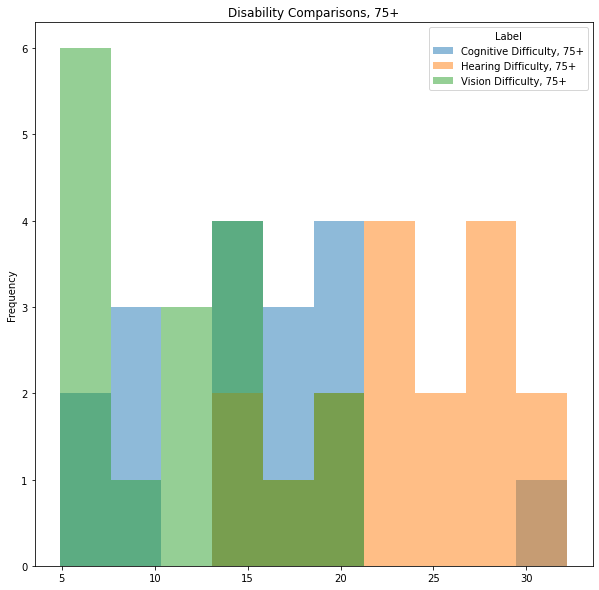

In [ ]:
disability_comparison = disabilities_percent[["Cognitive Difficulty, 75+","Hearing Difficulty, 75+", "Vision Difficulty, 75+"]]
disability_comparison.plot.hist(alpha=0.5,figsize=(10,10),bins=10,title="Disability Comparisons, 75+")

# Final Thoughts and Next Steps

Our overall goal is to understand the relationship that these two datasets have with each other. As such, we will have to take care in manipulating these tables and joining them together. However, before we take steps to understand the relationship between the two tables it is important that we first understand the relationship between the variables within the tables. Understanding these relationships will help guide us in terms of examining the tables in relation to each other. Another question that we are interested in potentially answering is how the adoption of the Medicaid expansion interacted with levels of health insurance, disability, income and other variables that we will be examining. Our immediate next steps consist of breaking down the larger tables into six total subtables and performing more detailed EDA on these smaller tables. 